In [1]:
from seisbench.models import EQTransformer

import matplotlib.pyplot as plt
from pnwstore.mseed import WaveformClient
import torch
import obspy
from obspy.core.utcdatetime import UTCDateTime

In [2]:
client = WaveformClient()
model = EQTransformer.from_pretrained('original')
model.to(torch.device('cuda'));

In [3]:
s_J25A = client.get_waveforms(network="7D", station="J25A", channel="?H?", year=2012, month=7, day=1)
s_J25A

8 Trace(s) in Stream:
7D.J25A..BH1 | 2012-07-01T00:00:00.016700Z - 2012-07-01T00:00:00.996700Z | 50.0 Hz, 50 samples
7D.J25A..BH1 | 2012-07-01T00:00:00.016700Z - 2012-07-01T00:00:12.916700Z | 50.0 Hz, 646 samples
7D.J25A..BH1 | 2012-07-01T00:00:11.930200Z - 2012-07-01T23:59:59.990200Z | 50.0 Hz, 4319404 samples
7D.J25A..BH2 | 2012-07-01T00:00:00.016700Z - 2012-07-01T00:00:00.996700Z | 50.0 Hz, 50 samples
7D.J25A..BH2 | 2012-07-01T00:00:00.016700Z - 2012-07-01T00:00:12.916700Z | 50.0 Hz, 646 samples
7D.J25A..BH2 | 2012-07-01T00:00:11.930200Z - 2012-07-01T23:59:59.990200Z | 50.0 Hz, 4319404 samples
7D.J25A..BHZ | 2012-07-01T00:00:00.016700Z - 2012-07-01T00:00:00.996700Z | 50.0 Hz, 50 samples
7D.J25A..BHZ | 2012-07-01T00:00:00.016700Z - 2012-07-01T23:59:59.996700Z | 50.0 Hz, 4320000 samples

In [26]:
s_J25A.filter(type='bandpass',freqmin=4,freqmax=15)

8 Trace(s) in Stream:
7D.J25A..BH1 | 2012-07-01T00:00:00.016700Z - 2012-07-01T00:00:00.996700Z | 50.0 Hz, 50 samples
7D.J25A..BH1 | 2012-07-01T00:00:00.016700Z - 2012-07-01T00:00:12.916700Z | 50.0 Hz, 646 samples
7D.J25A..BH1 | 2012-07-01T00:00:11.930200Z - 2012-07-01T23:59:59.990200Z | 50.0 Hz, 4319404 samples
7D.J25A..BH2 | 2012-07-01T00:00:00.016700Z - 2012-07-01T00:00:00.996700Z | 50.0 Hz, 50 samples
7D.J25A..BH2 | 2012-07-01T00:00:00.016700Z - 2012-07-01T00:00:12.916700Z | 50.0 Hz, 646 samples
7D.J25A..BH2 | 2012-07-01T00:00:11.930200Z - 2012-07-01T23:59:59.990200Z | 50.0 Hz, 4319404 samples
7D.J25A..BHZ | 2012-07-01T00:00:00.016700Z - 2012-07-01T00:00:00.996700Z | 50.0 Hz, 50 samples
7D.J25A..BHZ | 2012-07-01T00:00:00.016700Z - 2012-07-01T23:59:59.996700Z | 50.0 Hz, 4320000 samples

In [30]:
all_picks, all_detections = model.classify(s_J25A)

/home/hbito/.local/lib/python3.8/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (45) of bandpass is at or above Nyquist (25.0). Applying a high-pass instead.
  warnings.warn(msg)
2023-11-08 22:59:29,930 | seisbench | WARNING | Detected multiple records for the same time and component that did not agree. All mismatching traces will be ignored.


In [31]:
for p in all_picks:
    print(p)

7D.J25A.	2012-07-01T02:42:06.006700Z	P
7D.J25A.	2012-07-01T03:22:45.566700Z	P
7D.J25A.	2012-07-01T03:22:49.286700Z	S
7D.J25A.	2012-07-01T03:52:48.136700Z	S
7D.J25A.	2012-07-01T04:14:51.716700Z	S
7D.J25A.	2012-07-01T04:15:05.986700Z	P
7D.J25A.	2012-07-01T04:15:10.736700Z	S
7D.J25A.	2012-07-01T04:22:15.536700Z	P
7D.J25A.	2012-07-01T04:22:31.286700Z	S
7D.J25A.	2012-07-01T05:03:37.766700Z	P
7D.J25A.	2012-07-01T05:07:39.776700Z	P
7D.J25A.	2012-07-01T05:22:40.026700Z	P
7D.J25A.	2012-07-01T05:23:43.506700Z	P
7D.J25A.	2012-07-01T05:23:57.636700Z	S
7D.J25A.	2012-07-01T06:07:11.406700Z	P
7D.J25A.	2012-07-01T06:07:15.846700Z	S
7D.J25A.	2012-07-01T06:14:58.886700Z	P
7D.J25A.	2012-07-01T06:41:56.306700Z	P
7D.J25A.	2012-07-01T06:45:59.856700Z	P
7D.J25A.	2012-07-01T06:46:12.616700Z	S
7D.J25A.	2012-07-01T07:26:36.196700Z	P
7D.J25A.	2012-07-01T07:26:38.296700Z	S
7D.J25A.	2012-07-01T07:27:23.106700Z	P
7D.J25A.	2012-07-01T07:33:11.806700Z	P
7D.J25A.	2012-07-01T07:33:17.026700Z	P
7D.J25A.	2012-07-01T07:33

In [32]:
index = 1 # you can change this accordingly 
pick = all_picks[index]

print(f"This {pick.phase} phase is picked at {pick.peak_time}")

This P phase is picked at 2012-07-01T03:22:45.566700Z


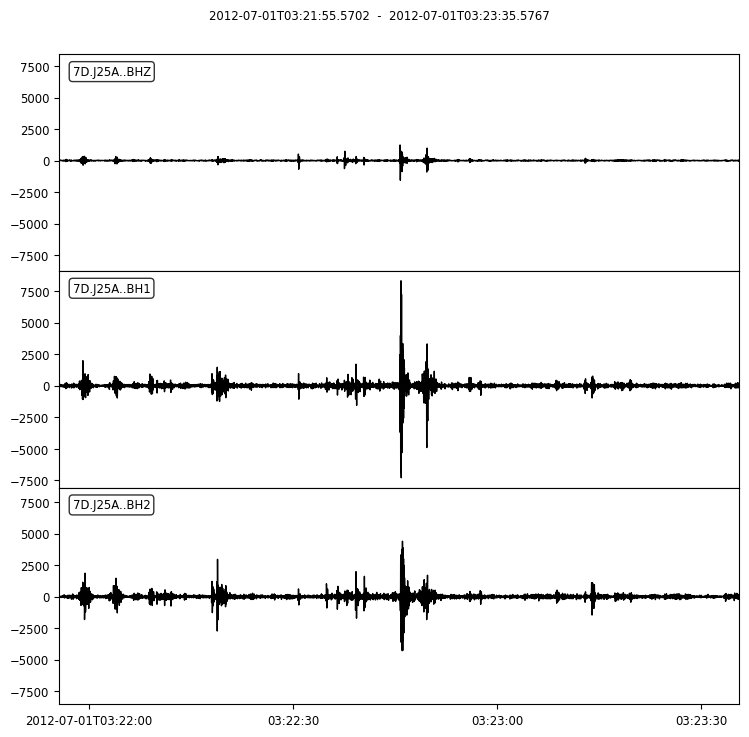

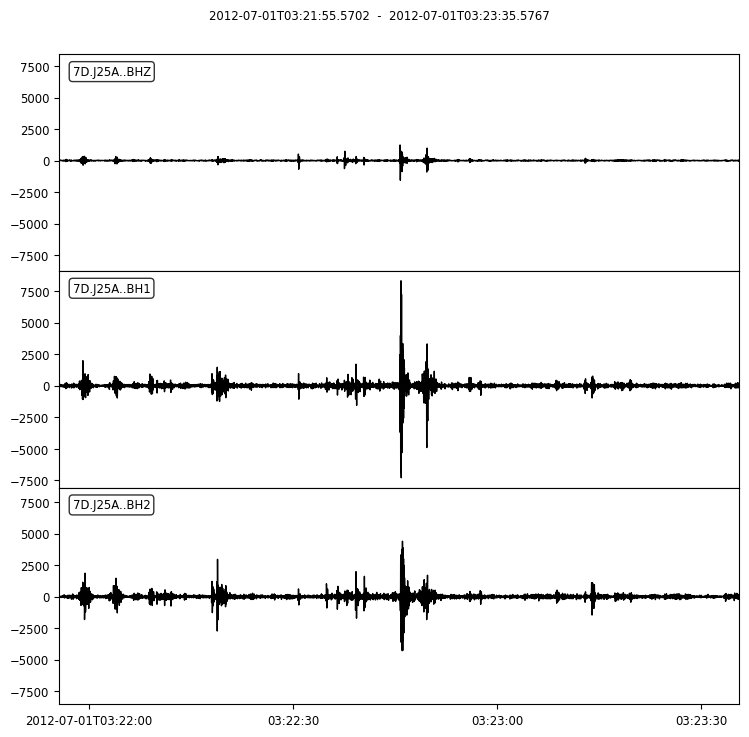

In [33]:
trim_s_J25A = s_J25A.copy().trim(starttime = UTCDateTime(pick.peak_time) - 50, 
                endtime = UTCDateTime(pick.peak_time) + 50)
trim_s_J25A.plot()

In [98]:
trim_s_J25A[0].times(type='matplotlib')
data = 

array([15522.14022651, 15522.14022674, 15522.14022697, ...,
       15522.14138345, 15522.14138368, 15522.14138391])

## Test Station J41A

In [34]:
s_J41A = client.get_waveforms(network="7D", station="J41A", channel="?H?", year=2012, month=7, day=1)
s_J41A

3 Trace(s) in Stream:
7D.J41A..HH1 | 2012-07-01T00:00:00.006000Z - 2012-07-02T00:00:01.998000Z | 125.0 Hz, 10800250 samples
7D.J41A..HH2 | 2012-07-01T00:00:00.006000Z - 2012-07-02T00:00:01.998000Z | 125.0 Hz, 10800250 samples
7D.J41A..HHZ | 2012-07-01T00:00:00.006000Z - 2012-07-02T00:00:01.998000Z | 125.0 Hz, 10800250 samples

In [35]:
s_J41A.filter(type='bandpass',freqmin=4,freqmax=15)

3 Trace(s) in Stream:
7D.J41A..HH1 | 2012-07-01T00:00:00.006000Z - 2012-07-02T00:00:01.998000Z | 125.0 Hz, 10800250 samples
7D.J41A..HH2 | 2012-07-01T00:00:00.006000Z - 2012-07-02T00:00:01.998000Z | 125.0 Hz, 10800250 samples
7D.J41A..HHZ | 2012-07-01T00:00:00.006000Z - 2012-07-02T00:00:01.998000Z | 125.0 Hz, 10800250 samples

In [36]:
all_picks, all_detections = model.classify(s_J41A)

In [37]:
for p in all_picks:
    print(p)

7D.J41A.	2012-07-01T00:17:04.666000Z	P
7D.J41A.	2012-07-01T00:17:05.006000Z	P
7D.J41A.	2012-07-01T00:17:09.696000Z	S
7D.J41A.	2012-07-01T00:19:53.316000Z	P
7D.J41A.	2012-07-01T00:20:12.446000Z	S
7D.J41A.	2012-07-01T00:23:27.476000Z	P
7D.J41A.	2012-07-01T00:23:28.466000Z	P
7D.J41A.	2012-07-01T00:23:29.486000Z	S
7D.J41A.	2012-07-01T00:25:40.236000Z	P
7D.J41A.	2012-07-01T00:25:49.726000Z	S
7D.J41A.	2012-07-01T00:28:46.946000Z	P
7D.J41A.	2012-07-01T00:33:22.106000Z	P
7D.J41A.	2012-07-01T00:33:23.866000Z	S
7D.J41A.	2012-07-01T00:33:40.366000Z	P
7D.J41A.	2012-07-01T00:33:42.186000Z	S
7D.J41A.	2012-07-01T00:48:11.516000Z	S
7D.J41A.	2012-07-01T00:48:42.786000Z	P
7D.J41A.	2012-07-01T00:48:52.856000Z	S
7D.J41A.	2012-07-01T00:51:52.766000Z	P
7D.J41A.	2012-07-01T00:52:09.656000Z	P
7D.J41A.	2012-07-01T00:55:10.126000Z	P
7D.J41A.	2012-07-01T00:55:14.156000Z	P
7D.J41A.	2012-07-01T00:55:18.526000Z	P
7D.J41A.	2012-07-01T00:55:19.056000Z	S
7D.J41A.	2012-07-01T00:55:54.476000Z	S
7D.J41A.	2012-07-01T00:56

In [38]:
index = 0 # you can change this accordingly 
pick = all_picks[index]

print(f"This {pick.phase} phase is picked at {pick.peak_time}")

This P phase is picked at 2012-07-01T00:17:04.666000Z


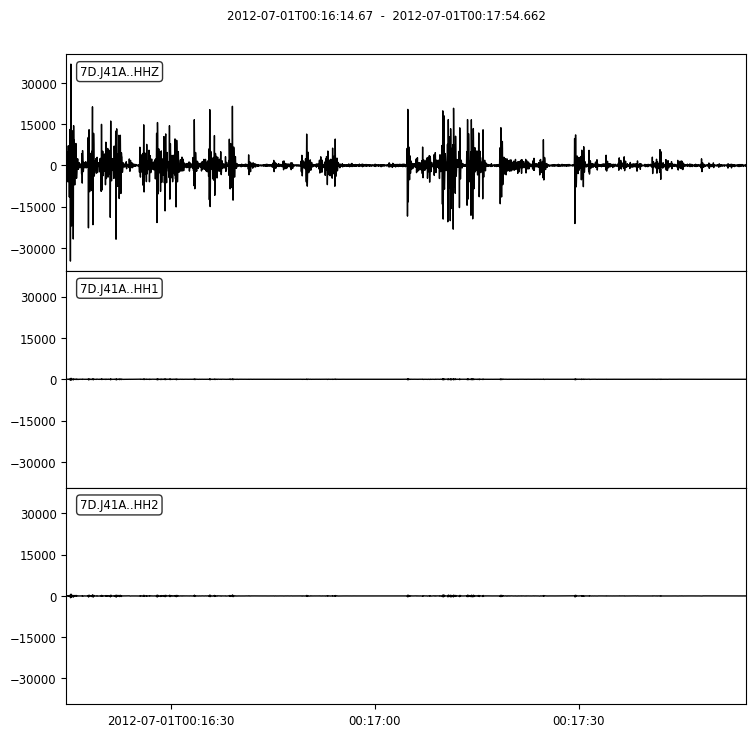

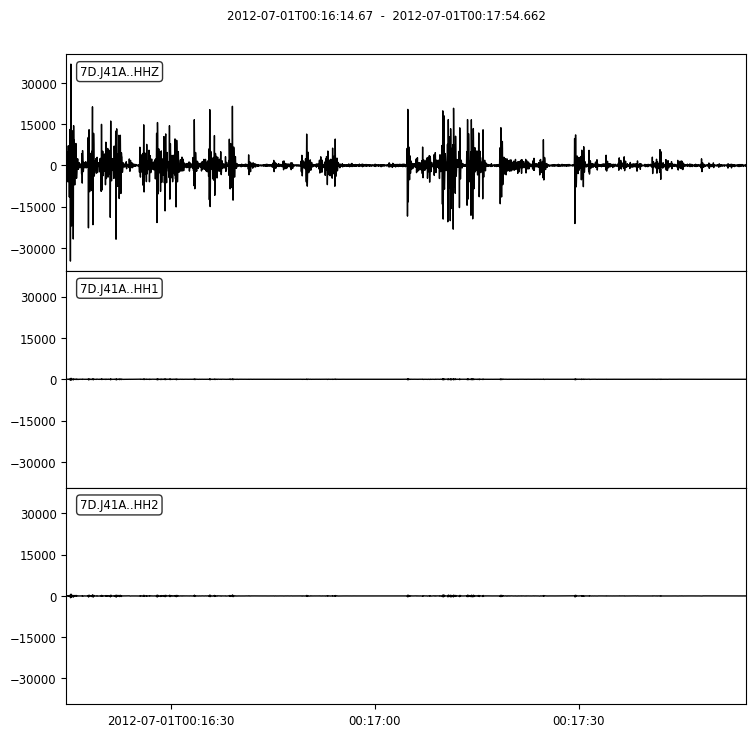

In [39]:
trim_s_J41A = s_J41A.copy().trim(starttime = UTCDateTime(pick.peak_time) - 50, 
                endtime = UTCDateTime(pick.peak_time) + 50)
trim_s_J41A.plot()

## Test Station J57A

In [40]:
s_J57A = client.get_waveforms(network="7D", station="J57A", channel="?H?", year=2012, month=7, day=2)
s_J57A

3 Trace(s) in Stream:
7D.J57A..BH1 | 2012-07-02T00:00:00.013900Z - 2012-07-02T23:59:59.993900Z | 50.0 Hz, 4320000 samples
7D.J57A..BH2 | 2012-07-02T00:00:00.013900Z - 2012-07-02T23:59:59.993900Z | 50.0 Hz, 4320000 samples
7D.J57A..BHZ | 2012-07-02T00:00:00.013900Z - 2012-07-02T23:59:59.993900Z | 50.0 Hz, 4320000 samples

In [41]:
s_J57A.filter(type='bandpass',freqmin=4,freqmax=15)

3 Trace(s) in Stream:
7D.J57A..BH1 | 2012-07-02T00:00:00.013900Z - 2012-07-02T23:59:59.993900Z | 50.0 Hz, 4320000 samples
7D.J57A..BH2 | 2012-07-02T00:00:00.013900Z - 2012-07-02T23:59:59.993900Z | 50.0 Hz, 4320000 samples
7D.J57A..BHZ | 2012-07-02T00:00:00.013900Z - 2012-07-02T23:59:59.993900Z | 50.0 Hz, 4320000 samples

In [43]:
all_picks, all_detections = model.classify(s_J57A)

/home/hbito/.local/lib/python3.8/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (45) of bandpass is at or above Nyquist (25.0). Applying a high-pass instead.
  warnings.warn(msg)


In [44]:
for p in all_picks:
    print(p)

7D.J57A.	2012-07-02T01:51:48.533900Z	P
7D.J57A.	2012-07-02T01:51:50.143900Z	S
7D.J57A.	2012-07-02T02:01:56.393900Z	P
7D.J57A.	2012-07-02T17:28:19.853900Z	P
7D.J57A.	2012-07-02T17:28:23.963900Z	S


In [45]:
index = 0 # you can change this accordingly 
pick = all_picks[index]

print(f"This {pick.phase} phase is picked at {pick.peak_time}")

This P phase is picked at 2012-07-02T01:51:48.533900Z


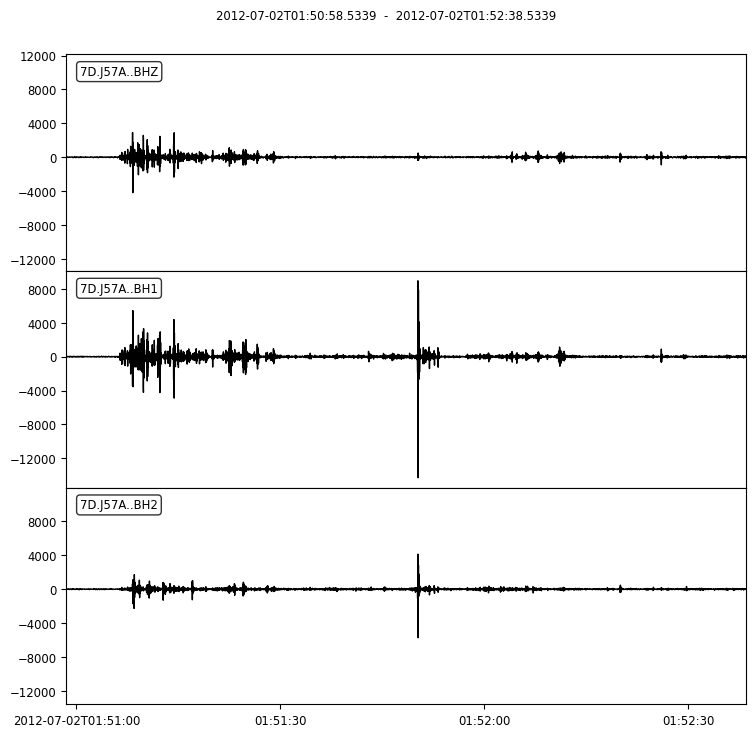

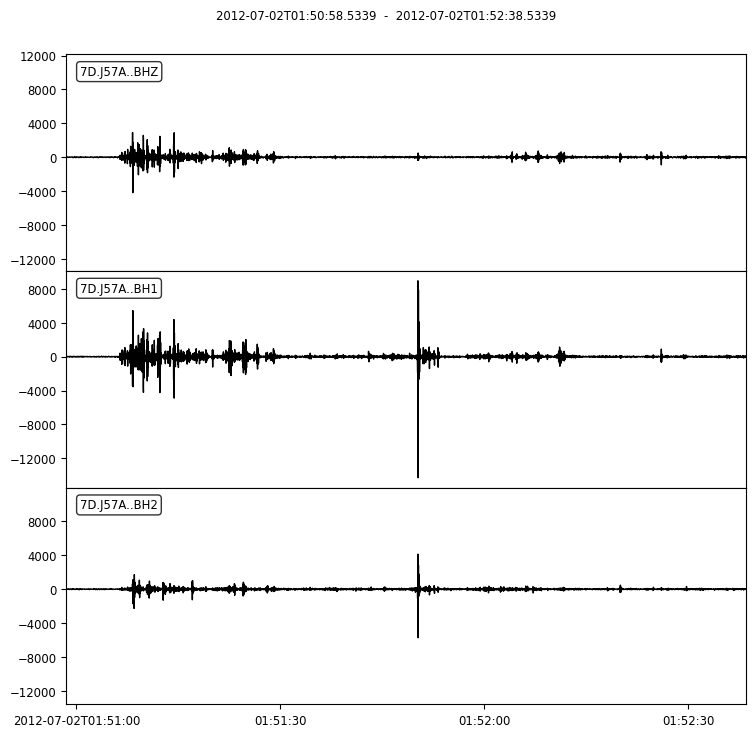

In [46]:
trim_s_J57A = s_J57A.copy().trim(starttime = UTCDateTime(pick.peak_time) - 50, 
                endtime = UTCDateTime(pick.peak_time) + 50)
trim_s_J57A.plot()

## Test M09B

In [47]:
s_M09B = client.get_waveforms(network="7D", station="M09B", channel="?H?", year=2012, month=7, day=30)
s_M09B

3 Trace(s) in Stream:
7D.M09B..HH1 | 2012-07-30T00:00:00.005000Z - 2012-07-30T23:59:59.997000Z | 125.0 Hz, 10800000 samples
7D.M09B..HH2 | 2012-07-30T00:00:00.005000Z - 2012-07-30T23:59:59.997000Z | 125.0 Hz, 10800000 samples
7D.M09B..HHZ | 2012-07-30T00:00:00.005000Z - 2012-07-30T23:59:59.997000Z | 125.0 Hz, 10800000 samples

In [48]:
s_M09B.filter(type='bandpass',freqmin=4,freqmax=15)

3 Trace(s) in Stream:
7D.M09B..HH1 | 2012-07-30T00:00:00.005000Z - 2012-07-30T23:59:59.997000Z | 125.0 Hz, 10800000 samples
7D.M09B..HH2 | 2012-07-30T00:00:00.005000Z - 2012-07-30T23:59:59.997000Z | 125.0 Hz, 10800000 samples
7D.M09B..HHZ | 2012-07-30T00:00:00.005000Z - 2012-07-30T23:59:59.997000Z | 125.0 Hz, 10800000 samples

In [49]:
all_picks, all_detections = model.classify(s_M09B)

In [50]:
for p in all_picks:
    print(p)

7D.M09B.	2012-07-30T00:15:40.695000Z	P
7D.M09B.	2012-07-30T00:15:44.175000Z	S
7D.M09B.	2012-07-30T00:20:29.275000Z	P
7D.M09B.	2012-07-30T00:20:39.245000Z	S
7D.M09B.	2012-07-30T00:44:43.295000Z	P
7D.M09B.	2012-07-30T00:44:43.725000Z	S
7D.M09B.	2012-07-30T00:44:55.455000Z	S
7D.M09B.	2012-07-30T00:49:31.355000Z	P
7D.M09B.	2012-07-30T00:49:37.145000Z	S
7D.M09B.	2012-07-30T00:50:14.725000Z	S
7D.M09B.	2012-07-30T00:57:43.565000Z	P
7D.M09B.	2012-07-30T00:57:45.885000Z	S
7D.M09B.	2012-07-30T01:26:24.005000Z	P
7D.M09B.	2012-07-30T01:26:27.565000Z	S
7D.M09B.	2012-07-30T01:33:10.915000Z	S
7D.M09B.	2012-07-30T01:33:17.205000Z	S
7D.M09B.	2012-07-30T02:09:35.755000Z	P
7D.M09B.	2012-07-30T02:09:43.615000Z	S
7D.M09B.	2012-07-30T02:10:57.135000Z	S
7D.M09B.	2012-07-30T02:20:00.905000Z	P
7D.M09B.	2012-07-30T02:20:04.505000Z	S
7D.M09B.	2012-07-30T02:20:23.375000Z	P
7D.M09B.	2012-07-30T02:29:00.405000Z	P
7D.M09B.	2012-07-30T02:29:02.205000Z	S
7D.M09B.	2012-07-30T02:53:39.665000Z	P
7D.M09B.	2012-07-30T02:53

In [51]:
index = 0 # you can change this accordingly 
pick = all_picks[index]

print(f"This {pick.phase} phase is picked at {pick.peak_time}")

This P phase is picked at 2012-07-30T00:15:40.695000Z


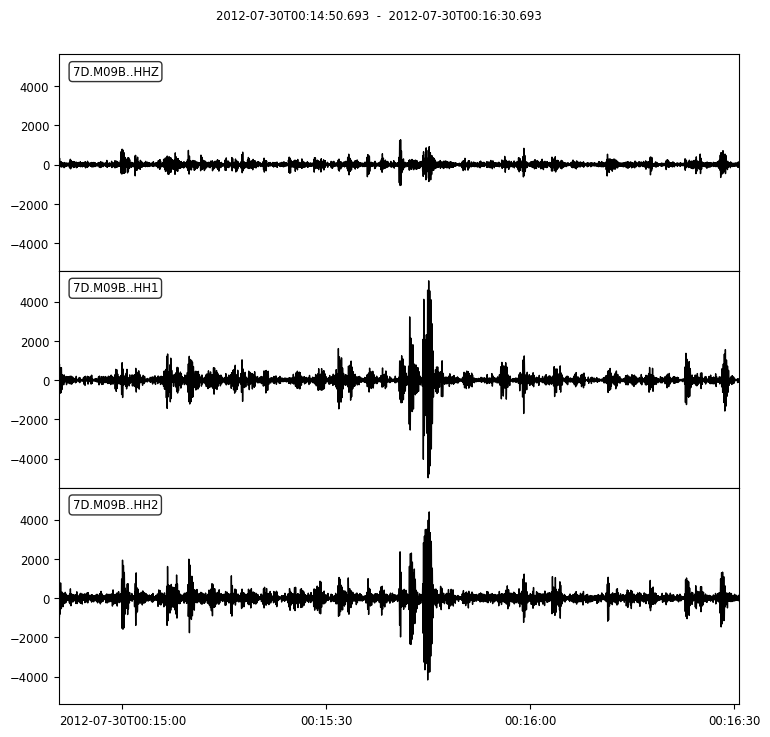

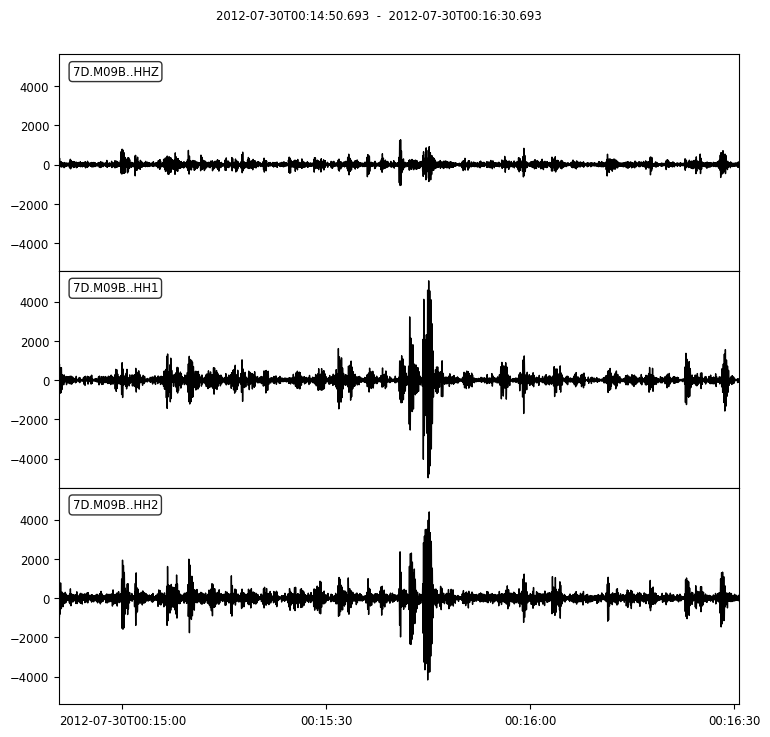

In [52]:
trim_s_M09B = s_M09B.copy().trim(starttime = UTCDateTime(pick.peak_time) - 50, 
                endtime = UTCDateTime(pick.peak_time) + 50)
trim_s_M09B.plot()

## Test J25B

In [54]:
s_J25B = client.get_waveforms(network="7D", station="J25B", channel="?H?", year=2012, month=7, day=30)
s_J25B

3 Trace(s) in Stream:
7D.J25B..HH1 | 2012-07-30T00:00:00.000400Z - 2012-07-30T23:59:59.992400Z | 125.0 Hz, 10800000 samples
7D.J25B..HH2 | 2012-07-30T00:00:00.000400Z - 2012-07-30T23:59:59.992400Z | 125.0 Hz, 10800000 samples
7D.J25B..HHZ | 2012-07-30T00:00:00.000400Z - 2012-07-30T23:59:59.992400Z | 125.0 Hz, 10800000 samples

In [55]:
s_J25B.filter(type='bandpass',freqmin=4,freqmax=15)

3 Trace(s) in Stream:
7D.J25B..HH1 | 2012-07-30T00:00:00.000400Z - 2012-07-30T23:59:59.992400Z | 125.0 Hz, 10800000 samples
7D.J25B..HH2 | 2012-07-30T00:00:00.000400Z - 2012-07-30T23:59:59.992400Z | 125.0 Hz, 10800000 samples
7D.J25B..HHZ | 2012-07-30T00:00:00.000400Z - 2012-07-30T23:59:59.992400Z | 125.0 Hz, 10800000 samples

In [56]:
all_picks, all_detections = model.classify(s_J25B)

In [57]:
for p in all_picks:
    print(p)

7D.J25B.	2012-07-30T00:04:56.790400Z	P
7D.J25B.	2012-07-30T00:05:01.510400Z	S
7D.J25B.	2012-07-30T00:05:51.080400Z	S
7D.J25B.	2012-07-30T00:10:44.370400Z	P
7D.J25B.	2012-07-30T00:10:44.480400Z	S
7D.J25B.	2012-07-30T00:16:28.440400Z	S
7D.J25B.	2012-07-30T00:16:48.970400Z	S
7D.J25B.	2012-07-30T00:23:50.180400Z	P
7D.J25B.	2012-07-30T00:23:51.790400Z	S
7D.J25B.	2012-07-30T00:33:37.990400Z	P
7D.J25B.	2012-07-30T00:33:41.060400Z	P
7D.J25B.	2012-07-30T00:33:43.250400Z	S
7D.J25B.	2012-07-30T01:32:09.960400Z	P
7D.J25B.	2012-07-30T01:32:10.110400Z	S
7D.J25B.	2012-07-30T01:34:46.320400Z	P
7D.J25B.	2012-07-30T01:34:47.550400Z	S
7D.J25B.	2012-07-30T01:41:54.070400Z	S
7D.J25B.	2012-07-30T01:54:42.990400Z	P
7D.J25B.	2012-07-30T01:54:43.800400Z	S
7D.J25B.	2012-07-30T02:23:07.940400Z	P
7D.J25B.	2012-07-30T02:23:08.970400Z	P
7D.J25B.	2012-07-30T02:23:09.610400Z	S
7D.J25B.	2012-07-30T02:33:35.020400Z	S
7D.J25B.	2012-07-30T02:48:22.070400Z	S
7D.J25B.	2012-07-30T02:51:10.460400Z	P
7D.J25B.	2012-07-30T02:51

In [58]:
index = 0 # you can change this accordingly 
pick = all_picks[index]

print(f"This {pick.phase} phase is picked at {pick.peak_time}")

This P phase is picked at 2012-07-30T00:04:56.790400Z


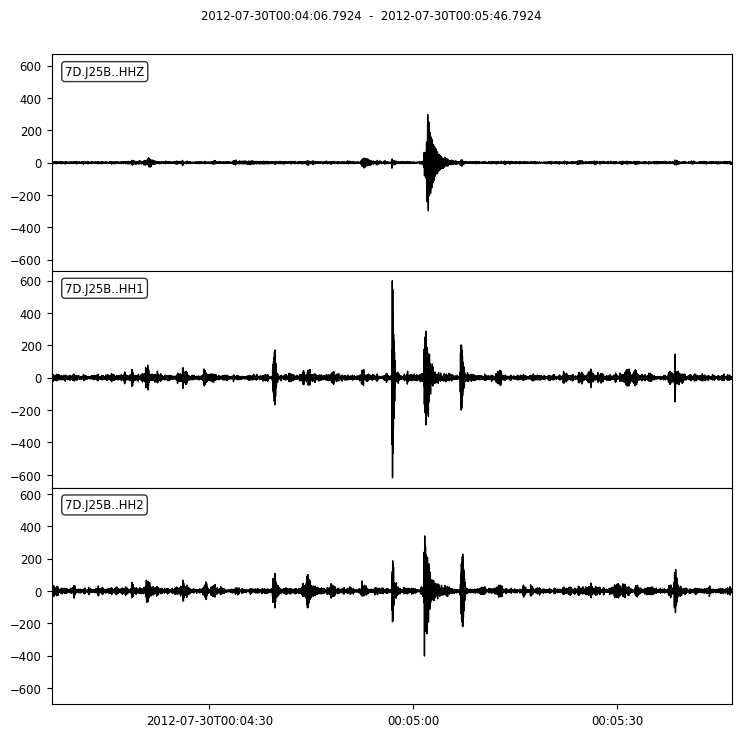

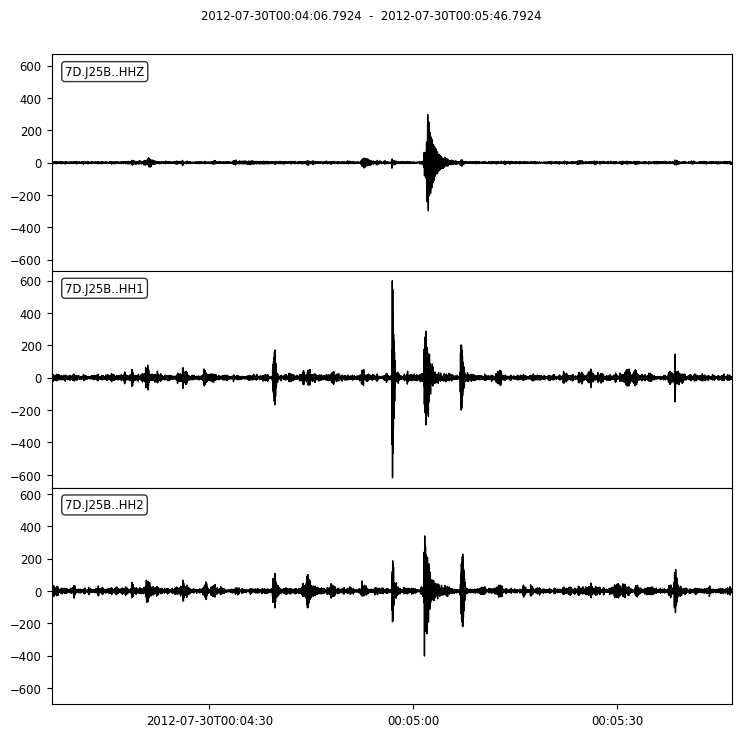

In [59]:
trim_s_J25B = s_J25B.copy().trim(starttime = UTCDateTime(pick.peak_time) - 50, 
                endtime = UTCDateTime(pick.peak_time) + 50)
trim_s_J25B.plot()

## Test Station G10B

In [60]:
s_G10B = client.get_waveforms(network="7D", station="G10B", channel="?H?", year=2012, month=9, day=3)
s_G10B

3 Trace(s) in Stream:
7D.G10B..BH1 | 2012-09-03T15:08:07.949486Z - 2012-09-03T23:59:59.989486Z | 50.0 Hz, 1595603 samples
7D.G10B..BH2 | 2012-09-03T15:08:07.949486Z - 2012-09-03T23:59:59.989486Z | 50.0 Hz, 1595603 samples
7D.G10B..BHZ | 2012-09-03T15:08:07.949486Z - 2012-09-03T23:59:59.989486Z | 50.0 Hz, 1595603 samples

In [61]:
s_G10B.filter(type='bandpass',freqmin=4,freqmax=15)

3 Trace(s) in Stream:
7D.G10B..BH1 | 2012-09-03T15:08:07.949486Z - 2012-09-03T23:59:59.989486Z | 50.0 Hz, 1595603 samples
7D.G10B..BH2 | 2012-09-03T15:08:07.949486Z - 2012-09-03T23:59:59.989486Z | 50.0 Hz, 1595603 samples
7D.G10B..BHZ | 2012-09-03T15:08:07.949486Z - 2012-09-03T23:59:59.989486Z | 50.0 Hz, 1595603 samples

In [62]:
all_picks, all_detections = model.classify(s_G10B)

/home/hbito/.local/lib/python3.8/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (45) of bandpass is at or above Nyquist (25.0). Applying a high-pass instead.
  warnings.warn(msg)


In [63]:
for p in all_picks:
    print(p)

7D.G10B.	2012-09-03T16:15:09.349486Z	S
7D.G10B.	2012-09-03T19:02:49.639486Z	P
7D.G10B.	2012-09-03T19:03:55.429486Z	P
7D.G10B.	2012-09-03T19:03:57.679486Z	S
7D.G10B.	2012-09-03T19:04:21.339486Z	P
7D.G10B.	2012-09-03T19:05:56.249486Z	P
7D.G10B.	2012-09-03T19:05:59.719486Z	S
7D.G10B.	2012-09-03T19:25:25.999486Z	P
7D.G10B.	2012-09-03T19:25:31.149486Z	S
7D.G10B.	2012-09-03T20:50:04.859486Z	P
7D.G10B.	2012-09-03T20:50:09.249486Z	S
7D.G10B.	2012-09-03T21:04:35.579486Z	P
7D.G10B.	2012-09-03T21:04:44.259486Z	S
7D.G10B.	2012-09-03T22:19:37.599486Z	P
7D.G10B.	2012-09-03T22:19:39.519486Z	S
7D.G10B.	2012-09-03T22:19:53.879486Z	P
7D.G10B.	2012-09-03T22:19:55.829486Z	S
7D.G10B.	2012-09-03T22:54:26.209486Z	P
7D.G10B.	2012-09-03T22:54:39.079486Z	S
7D.G10B.	2012-09-03T23:30:29.629486Z	P
7D.G10B.	2012-09-03T23:30:43.539486Z	S
7D.G10B.	2012-09-03T23:30:54.999486Z	S
7D.G10B.	2012-09-03T23:31:01.619486Z	S
7D.G10B.	2012-09-03T23:53:42.949486Z	P
7D.G10B.	2012-09-03T23:53:50.329486Z	S


In [64]:
index = 0 # you can change this accordingly 
pick = all_picks[index]

print(f"This {pick.phase} phase is picked at {pick.peak_time}")

This S phase is picked at 2012-09-03T16:15:09.349486Z


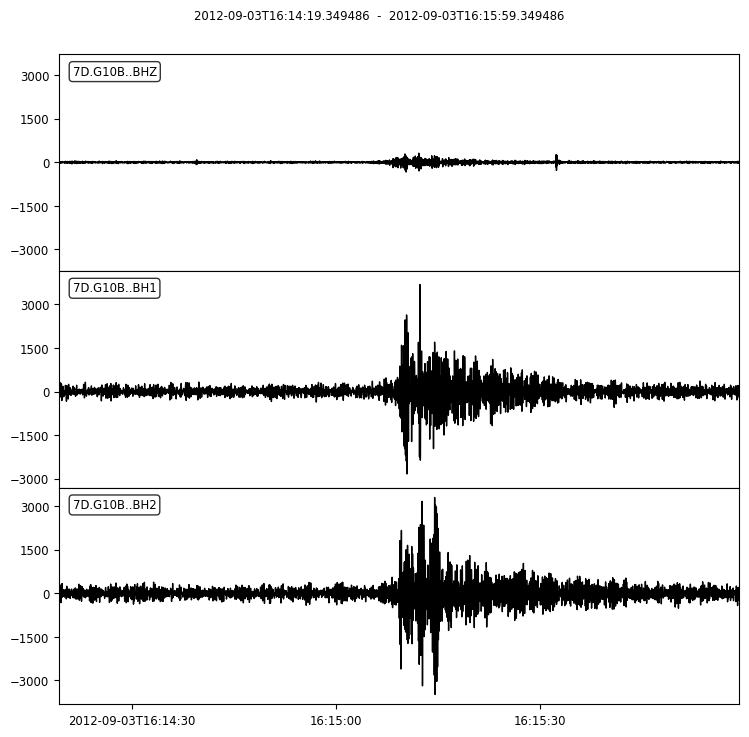

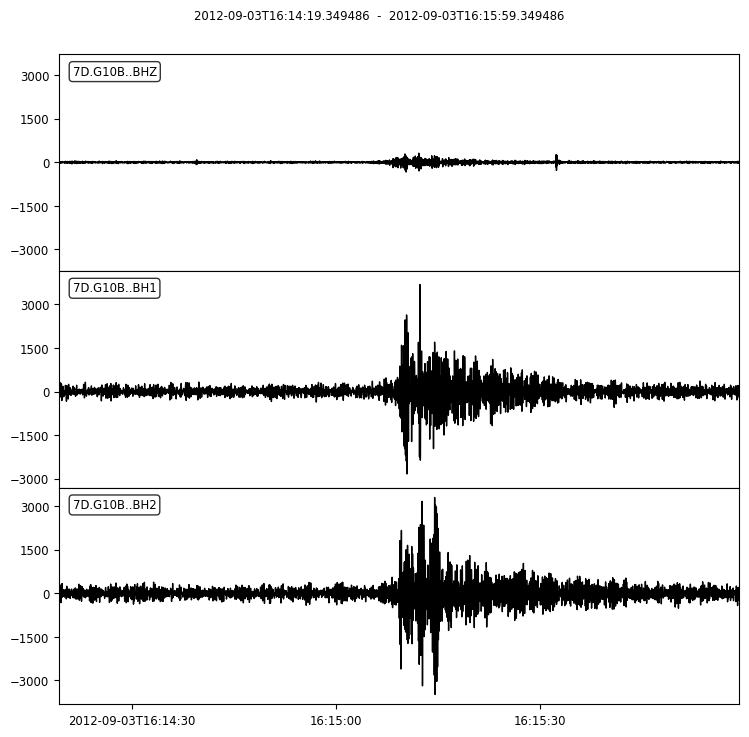

In [66]:
trim_s_G10B = s_G10B.copy().trim(starttime = UTCDateTime(pick.peak_time) - 50, 
                endtime = UTCDateTime(pick.peak_time) + 50)
trim_s_G10B.plot()

## Test Station FS09B

In [67]:
s_FS09B= client.get_waveforms(network="7D", station="FS09B", channel="?H?", year=2012, month=8, day=28)
s_FS09B

6 Trace(s) in Stream:
7D.FS09B..BH1 | 2012-08-28T00:00:56.900000Z - 2012-08-29T00:00:00.000000Z | 50.0 Hz, 4317156 samples
7D.FS09B..BH2 | 2012-08-28T00:00:58.340000Z - 2012-08-29T00:00:00.000000Z | 50.0 Hz, 4317084 samples
7D.FS09B..BHZ | 2012-08-28T00:01:00.180000Z - 2012-08-29T00:00:00.000000Z | 50.0 Hz, 4316992 samples
7D.FS09B..LH1 | 2012-08-28T00:35:50.000000Z - 2012-08-29T00:00:00.000000Z | 1.0 Hz, 84251 samples
7D.FS09B..LH2 | 2012-08-28T00:37:36.000000Z - 2012-08-29T00:00:00.000000Z | 1.0 Hz, 84145 samples
7D.FS09B..LHZ | 2012-08-28T00:37:17.000000Z - 2012-08-29T00:00:00.000000Z | 1.0 Hz, 84164 samples

In [68]:
s_FS09B.filter(type='bandpass',freqmin=4,freqmax=15)

/home/hbito/.local/lib/python3.8/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (15) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


ValueError: Selected corner frequency is above Nyquist.

In [59]:
all_picks, all_detections = model.classify(s_FS09B)

/home/hbito/.local/lib/python3.8/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (45) of bandpass is at or above Nyquist (25.0). Applying a high-pass instead.
  warnings.warn(msg)
/home/hbito/.local/lib/python3.8/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (45) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


ValueError: Selected corner frequency is above Nyquist.

In [ ]:
for p in all_picks:
    print(p)

In [6]:
index = 0 # you can change this accordingly 
pick = all_picks[index]

print(f"This {pick.phase} phase is picked at {pick.peak_time}")

This P phase is picked at 2012-07-01T09:27:49.166700Z


In [ ]:
trim_s_FS09B = s_FS09B.copy().trim(starttime = UTCDateTime(pick.peak_time) - 50, 
                endtime = UTCDateTime(pick.peak_time) + 50)
trim_s_FS09B.plot()

## Test Station FS13B

In [69]:
s_FS13B = client.get_waveforms(network="7D", station="FS13B", channel="?H?", year=2012, month=9, day=30)
s_FS13B

3 Trace(s) in Stream:
7D.FS13B..HH1 | 2012-09-30T00:00:00.004600Z - 2012-09-30T23:59:59.996600Z | 125.0 Hz, 10800000 samples
7D.FS13B..HH2 | 2012-09-30T00:00:00.004600Z - 2012-09-30T23:59:59.996600Z | 125.0 Hz, 10800000 samples
7D.FS13B..HHZ | 2012-09-30T00:00:00.004600Z - 2012-09-30T23:59:59.996600Z | 125.0 Hz, 10800000 samples

In [70]:
s_FS13B.filter(type='bandpass',freqmin=4,freqmax=15)

3 Trace(s) in Stream:
7D.FS13B..HH1 | 2012-09-30T00:00:00.004600Z - 2012-09-30T23:59:59.996600Z | 125.0 Hz, 10800000 samples
7D.FS13B..HH2 | 2012-09-30T00:00:00.004600Z - 2012-09-30T23:59:59.996600Z | 125.0 Hz, 10800000 samples
7D.FS13B..HHZ | 2012-09-30T00:00:00.004600Z - 2012-09-30T23:59:59.996600Z | 125.0 Hz, 10800000 samples

In [71]:
all_picks, all_detections = model.classify(s_FS13B)

In [72]:
for p in all_picks:
    print(p)

7D.FS13B.	2012-09-30T00:33:19.974600Z	S
7D.FS13B.	2012-09-30T00:40:02.784600Z	P
7D.FS13B.	2012-09-30T00:40:04.034600Z	S
7D.FS13B.	2012-09-30T00:51:29.394600Z	P
7D.FS13B.	2012-09-30T00:51:36.484600Z	S
7D.FS13B.	2012-09-30T01:10:05.014600Z	P
7D.FS13B.	2012-09-30T01:10:05.994600Z	P
7D.FS13B.	2012-09-30T01:10:17.304600Z	S
7D.FS13B.	2012-09-30T01:15:38.004600Z	P
7D.FS13B.	2012-09-30T01:15:47.604600Z	S
7D.FS13B.	2012-09-30T01:46:41.104600Z	P
7D.FS13B.	2012-09-30T01:55:35.004600Z	S
7D.FS13B.	2012-09-30T02:03:16.904600Z	S
7D.FS13B.	2012-09-30T02:05:40.614600Z	P
7D.FS13B.	2012-09-30T02:06:03.074600Z	P
7D.FS13B.	2012-09-30T02:06:11.584600Z	S
7D.FS13B.	2012-09-30T02:07:42.024600Z	P
7D.FS13B.	2012-09-30T02:09:13.844600Z	P
7D.FS13B.	2012-09-30T02:09:16.054600Z	S
7D.FS13B.	2012-09-30T02:12:05.004600Z	P
7D.FS13B.	2012-09-30T02:12:13.614600Z	S
7D.FS13B.	2012-09-30T02:13:45.754600Z	P
7D.FS13B.	2012-09-30T02:15:45.954600Z	S
7D.FS13B.	2012-09-30T02:23:06.964600Z	P
7D.FS13B.	2012-09-30T02:23:08.974600Z	P


In [73]:
index = 0 # you can change this accordingly 
pick = all_picks[index]

print(f"This {pick.phase} phase is picked at {pick.peak_time}")

This S phase is picked at 2012-09-30T00:33:19.974600Z


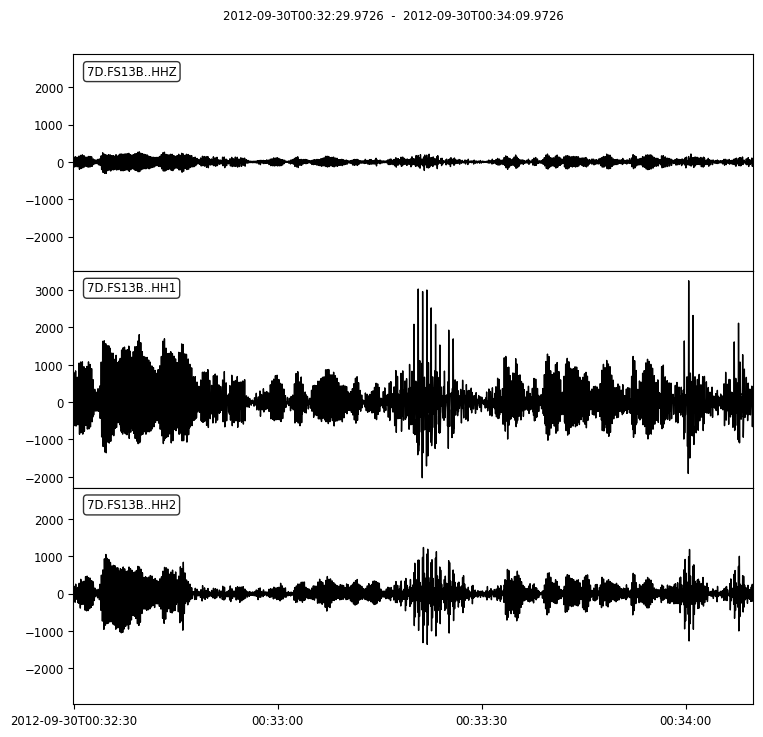

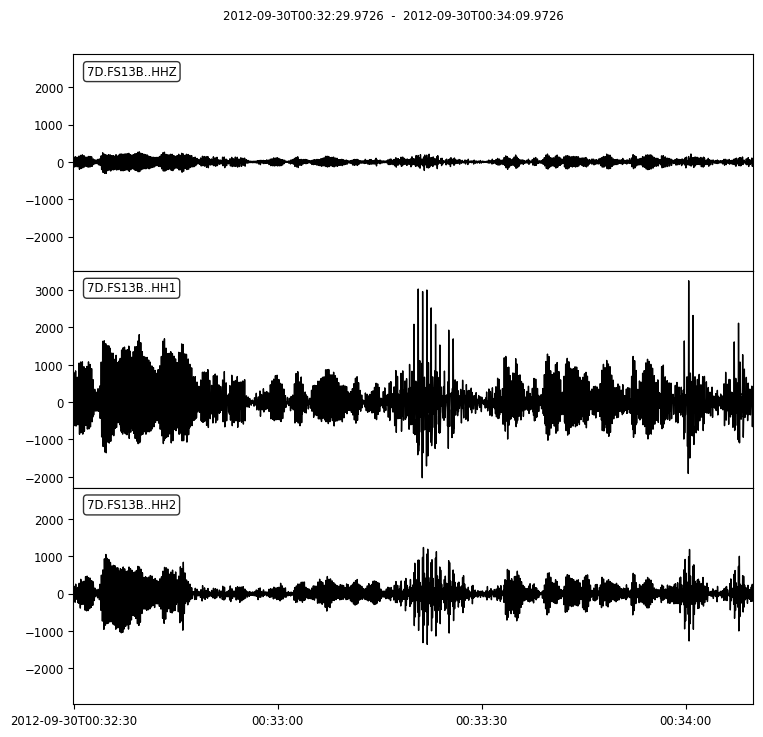

In [74]:
trim_s_FS13B = s_FS13B.copy().trim(starttime = UTCDateTime(pick.peak_time) - 50, 
                endtime = UTCDateTime(pick.peak_time) + 50)
trim_s_FS13B.plot()
# s_FS13B[1].plot(type="dayplot")

## Test Station FS16B

In [75]:
s_FS16B = client.get_waveforms(network="7D", station="FS16B", channel="?H?", year=2012, month=9, day=30)
s_FS16B

3 Trace(s) in Stream:
7D.FS16B..HH1 | 2012-09-30T00:00:00.002200Z - 2012-09-30T23:59:59.994200Z | 125.0 Hz, 10800000 samples
7D.FS16B..HH2 | 2012-09-30T00:00:00.002200Z - 2012-09-30T23:59:59.994200Z | 125.0 Hz, 10800000 samples
7D.FS16B..HHZ | 2012-09-30T00:00:00.002200Z - 2012-09-30T23:59:59.994200Z | 125.0 Hz, 10800000 samples

In [76]:
s_FS16B.filter(type='bandpass',freqmin=4,freqmax=15)

3 Trace(s) in Stream:
7D.FS16B..HH1 | 2012-09-30T00:00:00.002200Z - 2012-09-30T23:59:59.994200Z | 125.0 Hz, 10800000 samples
7D.FS16B..HH2 | 2012-09-30T00:00:00.002200Z - 2012-09-30T23:59:59.994200Z | 125.0 Hz, 10800000 samples
7D.FS16B..HHZ | 2012-09-30T00:00:00.002200Z - 2012-09-30T23:59:59.994200Z | 125.0 Hz, 10800000 samples

In [77]:
all_picks, all_detections = model.classify(s_FS16B)

In [78]:
for p in all_picks:
    print(p)

7D.FS16B.	2012-09-30T00:04:56.232200Z	P
7D.FS16B.	2012-09-30T00:04:56.442200Z	S
7D.FS16B.	2012-09-30T00:26:44.992200Z	P
7D.FS16B.	2012-09-30T00:26:48.342200Z	S
7D.FS16B.	2012-09-30T00:27:13.582200Z	S
7D.FS16B.	2012-09-30T01:05:50.832200Z	P
7D.FS16B.	2012-09-30T01:05:55.512200Z	S
7D.FS16B.	2012-09-30T01:08:09.032200Z	P
7D.FS16B.	2012-09-30T01:08:22.432200Z	S
7D.FS16B.	2012-09-30T01:19:46.972200Z	S
7D.FS16B.	2012-09-30T02:13:51.612200Z	P
7D.FS16B.	2012-09-30T02:14:05.512200Z	S
7D.FS16B.	2012-09-30T02:15:30.142200Z	S
7D.FS16B.	2012-09-30T02:20:19.572200Z	S
7D.FS16B.	2012-09-30T02:21:06.982200Z	P
7D.FS16B.	2012-09-30T02:21:07.982200Z	P
7D.FS16B.	2012-09-30T02:21:12.292200Z	S
7D.FS16B.	2012-09-30T04:12:29.332200Z	S
7D.FS16B.	2012-09-30T05:18:32.582200Z	P
7D.FS16B.	2012-09-30T05:34:21.502200Z	P
7D.FS16B.	2012-09-30T05:34:21.652200Z	S
7D.FS16B.	2012-09-30T05:41:35.002200Z	P
7D.FS16B.	2012-09-30T05:41:39.222200Z	S
7D.FS16B.	2012-09-30T06:12:16.992200Z	P
7D.FS16B.	2012-09-30T06:12:26.572200Z	S


In [79]:
index = 0 # you can change this accordingly 
pick = all_picks[index]

print(f"This {pick.phase} phase is picked at {pick.peak_time}")

This P phase is picked at 2012-09-30T00:04:56.232200Z


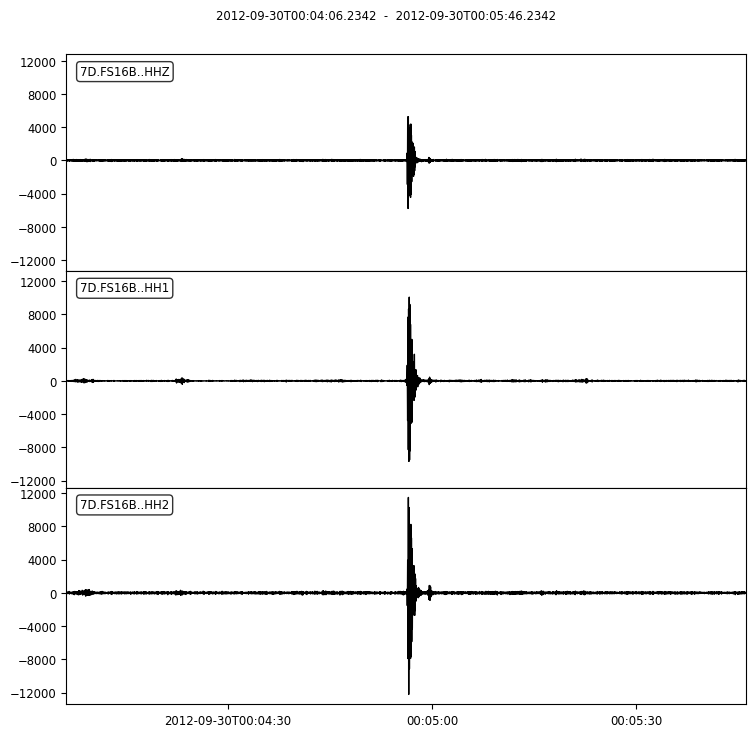

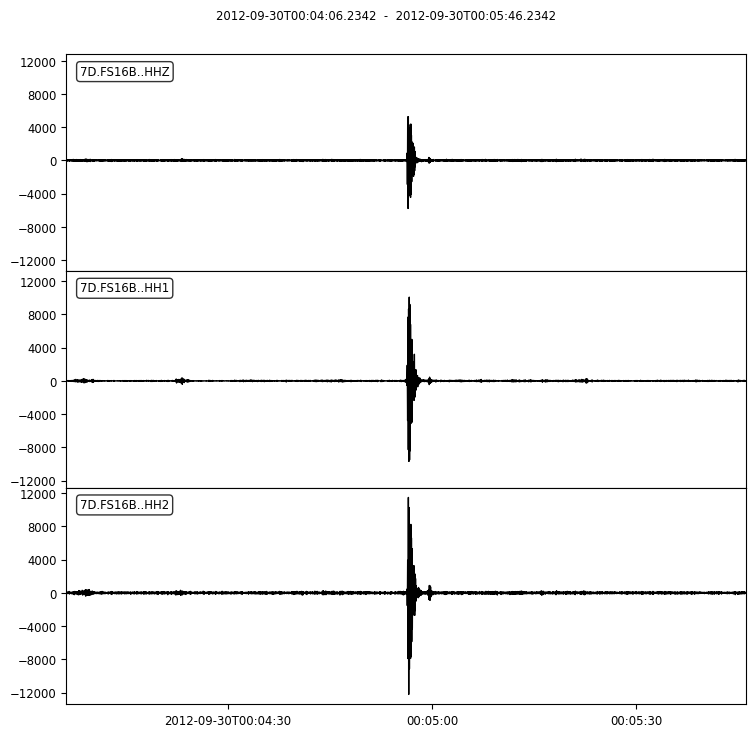

In [80]:
trim_s_FS16B = s_FS16B.copy().trim(starttime = UTCDateTime(pick.peak_time) - 50, 
                endtime = UTCDateTime(pick.peak_time) + 50)
trim_s_FS16B.plot()

## Test Station G19B

In [81]:
s_G19B = client.get_waveforms(network="7D", station="G19B", channel="?H?", year=2012, month=9, day=1)
s_G19B

6 Trace(s) in Stream:
7D.G19B..BH1 | 2012-09-01T00:00:00.000200Z - 2012-09-01T23:59:59.980200Z | 50.0 Hz, 4320000 samples
7D.G19B..BH2 | 2012-09-01T00:00:00.000200Z - 2012-09-01T23:59:59.980200Z | 50.0 Hz, 4320000 samples
7D.G19B..BHZ | 2012-09-01T00:00:00.000200Z - 2012-09-01T23:59:59.980200Z | 50.0 Hz, 4320000 samples
7D.G19B..LH1 | 2012-09-01T00:00:00.000200Z - 2012-09-01T23:59:59.000200Z | 1.0 Hz, 86400 samples
7D.G19B..LH2 | 2012-09-01T00:00:00.000200Z - 2012-09-01T23:59:59.000200Z | 1.0 Hz, 86400 samples
7D.G19B..LHZ | 2012-09-01T00:00:00.000200Z - 2012-09-01T23:59:59.000200Z | 1.0 Hz, 86400 samples

In [82]:
s_G19B.filter(type='bandpass',freqmin=4,freqmax=15)

/home/hbito/.local/lib/python3.8/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (15) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


ValueError: Selected corner frequency is above Nyquist.

In [82]:
all_picks, all_detections = model.classify(s_G19B)

/home/hbito/.local/lib/python3.8/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (45) of bandpass is at or above Nyquist (25.0). Applying a high-pass instead.
  warnings.warn(msg)
/home/hbito/.local/lib/python3.8/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (45) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


ValueError: Selected corner frequency is above Nyquist.

In [78]:
for p in all_picks:
    print(p)

7D.FS16B.	2012-09-30T00:26:41.992200Z	P
7D.FS16B.	2012-09-30T00:26:42.982200Z	P
7D.FS16B.	2012-09-30T00:26:44.852200Z	P
7D.FS16B.	2012-09-30T00:26:48.222200Z	S
7D.FS16B.	2012-09-30T00:27:13.552200Z	S
7D.FS16B.	2012-09-30T02:21:09.962200Z	P
7D.FS16B.	2012-09-30T02:21:12.232200Z	S
7D.FS16B.	2012-09-30T03:00:41.912200Z	P
7D.FS16B.	2012-09-30T03:00:43.952200Z	S
7D.FS16B.	2012-09-30T05:18:32.562200Z	P
7D.FS16B.	2012-09-30T05:34:21.362200Z	P
7D.FS16B.	2012-09-30T05:34:21.502200Z	S
7D.FS16B.	2012-09-30T05:41:35.002200Z	P
7D.FS16B.	2012-09-30T05:41:39.102200Z	S
7D.FS16B.	2012-09-30T06:19:54.402200Z	S
7D.FS16B.	2012-09-30T06:32:38.012200Z	P
7D.FS16B.	2012-09-30T06:32:46.452200Z	S
7D.FS16B.	2012-09-30T06:38:14.772200Z	S
7D.FS16B.	2012-09-30T06:38:49.112200Z	S
7D.FS16B.	2012-09-30T06:43:10.492200Z	S
7D.FS16B.	2012-09-30T10:30:05.002200Z	S
7D.FS16B.	2012-09-30T10:31:37.052200Z	P
7D.FS16B.	2012-09-30T10:31:37.242200Z	S
7D.FS16B.	2012-09-30T11:19:05.022200Z	P
7D.FS16B.	2012-09-30T11:19:06.372200Z	S


In [6]:
index = 0 # you can change this accordingly 
pick = all_picks[index]

print(f"This {pick.phase} phase is picked at {pick.peak_time}")

This P phase is picked at 2012-07-01T09:27:49.166700Z


In [79]:
trim_s_G19B = s_G19B.copy().trim(starttime = UTCDateTime(pick.peak_time) - 50, 
                endtime = UTCDateTime(pick.peak_time) + 50)
trim_s_G19B.plot()

IndexError: Empty stream object

## Test Station M06C

In [84]:
s_M06C = client.get_waveforms(network="7D", station="M06C", channel="?H?", year=2013, month=9, day=30)
s_M06C

3 Trace(s) in Stream:
7D.M06C..HH1 | 2013-09-30T00:00:00.006100Z - 2013-09-30T23:59:59.995373Z | 125.0 Hz, 10799999 samples
7D.M06C..HH2 | 2013-09-30T00:00:00.006100Z - 2013-09-30T23:59:59.995373Z | 125.0 Hz, 10799999 samples
7D.M06C..HHZ | 2013-09-30T00:00:00.006100Z - 2013-09-30T23:59:59.995373Z | 125.0 Hz, 10799999 samples

In [85]:
s_M06C.filter(type='bandpass',freqmin=4,freqmax=15)

3 Trace(s) in Stream:
7D.M06C..HH1 | 2013-09-30T00:00:00.006100Z - 2013-09-30T23:59:59.995373Z | 125.0 Hz, 10799999 samples
7D.M06C..HH2 | 2013-09-30T00:00:00.006100Z - 2013-09-30T23:59:59.995373Z | 125.0 Hz, 10799999 samples
7D.M06C..HHZ | 2013-09-30T00:00:00.006100Z - 2013-09-30T23:59:59.995373Z | 125.0 Hz, 10799999 samples

In [86]:
all_picks, all_detections = model.classify(s_M06C)

In [87]:
for p in all_picks:
    print(p)

7D.M06C.	2013-09-30T02:10:35.006100Z	P
7D.M06C.	2013-09-30T02:26:52.726100Z	S
7D.M06C.	2013-09-30T09:06:45.936100Z	S
7D.M06C.	2013-09-30T09:07:02.976100Z	S
7D.M06C.	2013-09-30T13:07:42.786100Z	P
7D.M06C.	2013-09-30T13:07:45.006100Z	S
7D.M06C.	2013-09-30T13:14:02.206100Z	P
7D.M06C.	2013-09-30T15:15:05.996100Z	P
7D.M06C.	2013-09-30T15:40:11.966100Z	P
7D.M06C.	2013-09-30T15:41:36.386100Z	P
7D.M06C.	2013-09-30T15:42:14.896100Z	S
7D.M06C.	2013-09-30T15:51:21.276100Z	P
7D.M06C.	2013-09-30T16:30:35.026100Z	P
7D.M06C.	2013-09-30T16:30:59.696100Z	S
7D.M06C.	2013-09-30T16:32:58.876100Z	P
7D.M06C.	2013-09-30T22:59:49.096100Z	S


In [88]:
index = 0 # you can change this accordingly 
pick = all_picks[index]

print(f"This {pick.phase} phase is picked at {pick.peak_time}")

This P phase is picked at 2013-09-30T02:10:35.006100Z


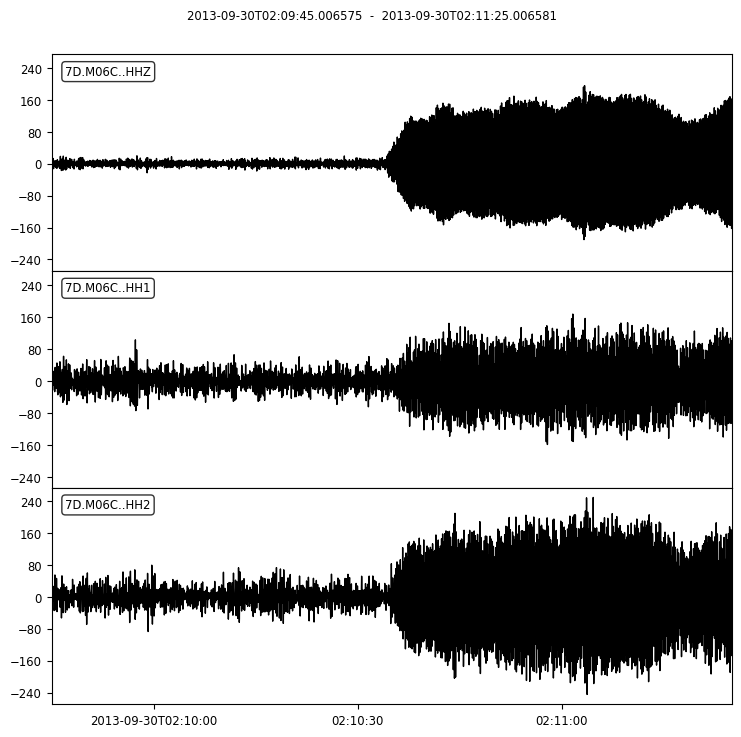

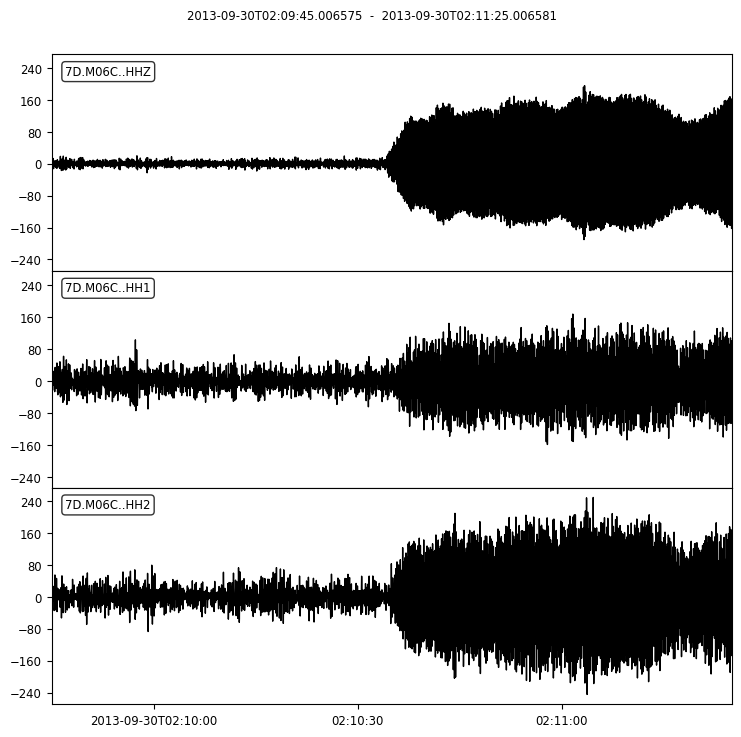

In [89]:
trim_s_M06C = s_M06C.copy().trim(starttime = UTCDateTime(pick.peak_time) - 50, 
                endtime = UTCDateTime(pick.peak_time) + 50)
trim_s_M06C.plot()

## Test Station FN02C

In [90]:
s_FN02C = client.get_waveforms(network="7D", station="FN02C", channel="?H?", year=2013, month=9, day=30)
s_FN02C

3 Trace(s) in Stream:
7D.FN02C..HH1 | 2013-09-30T00:00:00.001500Z - 2013-09-30T23:59:59.993500Z | 125.0 Hz, 10800000 samples
7D.FN02C..HH2 | 2013-09-30T00:00:00.001500Z - 2013-09-30T23:59:59.993500Z | 125.0 Hz, 10800000 samples
7D.FN02C..HHZ | 2013-09-30T00:00:00.001500Z - 2013-09-30T23:59:59.993500Z | 125.0 Hz, 10800000 samples

In [91]:
s_FN02C.filter(type='bandpass',freqmin=4,freqmax=15)

3 Trace(s) in Stream:
7D.FN02C..HH1 | 2013-09-30T00:00:00.001500Z - 2013-09-30T23:59:59.993500Z | 125.0 Hz, 10800000 samples
7D.FN02C..HH2 | 2013-09-30T00:00:00.001500Z - 2013-09-30T23:59:59.993500Z | 125.0 Hz, 10800000 samples
7D.FN02C..HHZ | 2013-09-30T00:00:00.001500Z - 2013-09-30T23:59:59.993500Z | 125.0 Hz, 10800000 samples

In [92]:
all_picks, all_detections = model.classify(s_FN02C)

In [93]:
for p in all_picks:
    print(p)

7D.FN02C.	2013-09-30T00:32:43.771500Z	P
7D.FN02C.	2013-09-30T00:32:46.121500Z	S
7D.FN02C.	2013-09-30T01:08:57.021500Z	S
7D.FN02C.	2013-09-30T02:31:38.641500Z	P
7D.FN02C.	2013-09-30T02:31:38.701500Z	S
7D.FN02C.	2013-09-30T05:45:10.701500Z	P
7D.FN02C.	2013-09-30T05:45:12.651500Z	P
7D.FN02C.	2013-09-30T05:45:12.761500Z	S
7D.FN02C.	2013-09-30T06:02:14.531500Z	P
7D.FN02C.	2013-09-30T06:02:18.911500Z	S
7D.FN02C.	2013-09-30T06:47:07.331500Z	P
7D.FN02C.	2013-09-30T06:47:10.011500Z	S
7D.FN02C.	2013-09-30T06:47:54.911500Z	S
7D.FN02C.	2013-09-30T08:13:58.711500Z	P
7D.FN02C.	2013-09-30T08:13:59.371500Z	S
7D.FN02C.	2013-09-30T08:20:36.521500Z	S
7D.FN02C.	2013-09-30T09:58:50.901500Z	P
7D.FN02C.	2013-09-30T09:58:51.341500Z	S
7D.FN02C.	2013-09-30T12:42:41.531500Z	P
7D.FN02C.	2013-09-30T12:42:42.811500Z	S
7D.FN02C.	2013-09-30T13:55:41.971500Z	P
7D.FN02C.	2013-09-30T13:55:43.591500Z	S
7D.FN02C.	2013-09-30T14:15:35.001500Z	P
7D.FN02C.	2013-09-30T14:45:51.721500Z	P
7D.FN02C.	2013-09-30T14:45:53.781500Z	S


In [94]:
index = 0 # you can change this accordingly 
pick = all_picks[index]

print(f"This {pick.phase} phase is picked at {pick.peak_time}")

This P phase is picked at 2013-09-30T00:32:43.771500Z


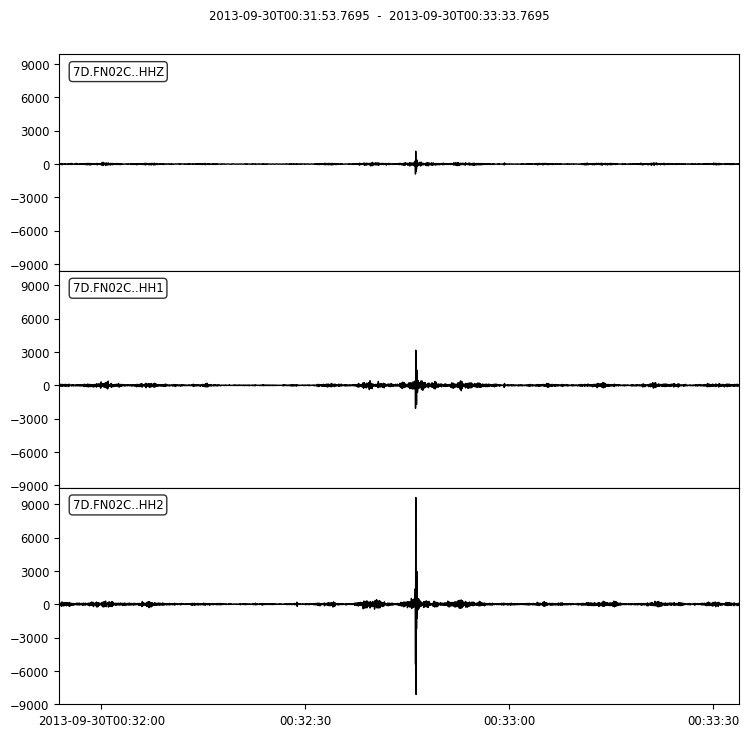

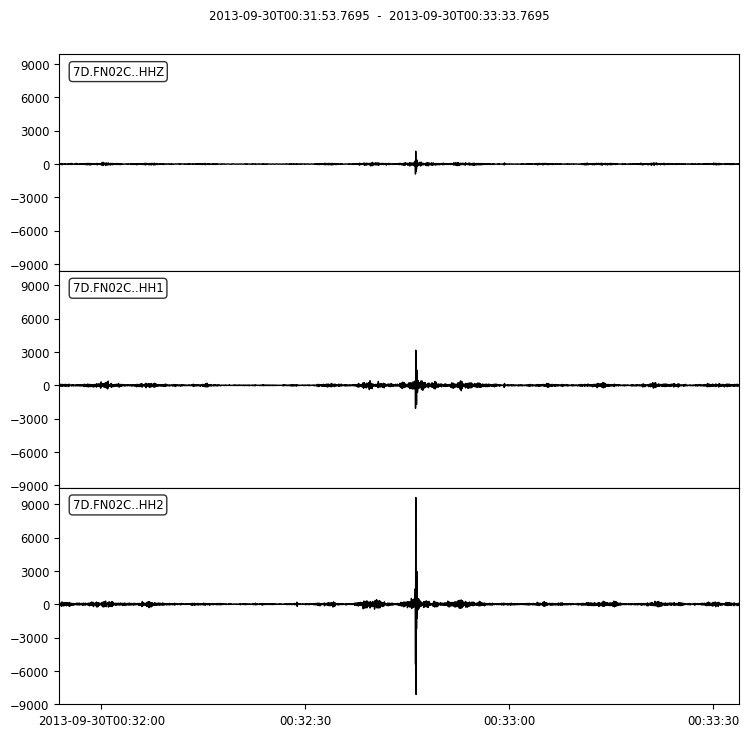

In [95]:
trim_s_FN02C= s_FN02C.copy().trim(starttime = UTCDateTime(pick.peak_time) - 50, 
                endtime = UTCDateTime(pick.peak_time) + 50)
trim_s_FN02C.plot()

## Test Station J41A

In [ ]:
s_J41A = client.get_waveforms(network="7D", station="J41A", channel="?H?", year=2012, month=7, day=1)
s_J41A

In [77]:
all_picks, all_detections = model.classify(s_FS16B)

In [78]:
for p in all_picks:
    print(p)

7D.FS16B.	2012-09-30T00:26:41.992200Z	P
7D.FS16B.	2012-09-30T00:26:42.982200Z	P
7D.FS16B.	2012-09-30T00:26:44.852200Z	P
7D.FS16B.	2012-09-30T00:26:48.222200Z	S
7D.FS16B.	2012-09-30T00:27:13.552200Z	S
7D.FS16B.	2012-09-30T02:21:09.962200Z	P
7D.FS16B.	2012-09-30T02:21:12.232200Z	S
7D.FS16B.	2012-09-30T03:00:41.912200Z	P
7D.FS16B.	2012-09-30T03:00:43.952200Z	S
7D.FS16B.	2012-09-30T05:18:32.562200Z	P
7D.FS16B.	2012-09-30T05:34:21.362200Z	P
7D.FS16B.	2012-09-30T05:34:21.502200Z	S
7D.FS16B.	2012-09-30T05:41:35.002200Z	P
7D.FS16B.	2012-09-30T05:41:39.102200Z	S
7D.FS16B.	2012-09-30T06:19:54.402200Z	S
7D.FS16B.	2012-09-30T06:32:38.012200Z	P
7D.FS16B.	2012-09-30T06:32:46.452200Z	S
7D.FS16B.	2012-09-30T06:38:14.772200Z	S
7D.FS16B.	2012-09-30T06:38:49.112200Z	S
7D.FS16B.	2012-09-30T06:43:10.492200Z	S
7D.FS16B.	2012-09-30T10:30:05.002200Z	S
7D.FS16B.	2012-09-30T10:31:37.052200Z	P
7D.FS16B.	2012-09-30T10:31:37.242200Z	S
7D.FS16B.	2012-09-30T11:19:05.022200Z	P
7D.FS16B.	2012-09-30T11:19:06.372200Z	S


In [79]:
trim_s_FS16B = s_FS16B.copy().trim(starttime = UTCDateTime(pick.peak_time) - 50, 
                endtime = UTCDateTime(pick.peak_time) + 50)
trim_s_FS16B.plot()

IndexError: Empty stream object

## Test Station J41A

In [ ]:
s_J41A = client.get_waveforms(network="7D", station="J41A", channel="?H?", year=2012, month=7, day=1)
s_J41A

In [77]:
all_picks, all_detections = model.classify(s_FS16B)

In [78]:
for p in all_picks:
    print(p)

7D.FS16B.	2012-09-30T00:26:41.992200Z	P
7D.FS16B.	2012-09-30T00:26:42.982200Z	P
7D.FS16B.	2012-09-30T00:26:44.852200Z	P
7D.FS16B.	2012-09-30T00:26:48.222200Z	S
7D.FS16B.	2012-09-30T00:27:13.552200Z	S
7D.FS16B.	2012-09-30T02:21:09.962200Z	P
7D.FS16B.	2012-09-30T02:21:12.232200Z	S
7D.FS16B.	2012-09-30T03:00:41.912200Z	P
7D.FS16B.	2012-09-30T03:00:43.952200Z	S
7D.FS16B.	2012-09-30T05:18:32.562200Z	P
7D.FS16B.	2012-09-30T05:34:21.362200Z	P
7D.FS16B.	2012-09-30T05:34:21.502200Z	S
7D.FS16B.	2012-09-30T05:41:35.002200Z	P
7D.FS16B.	2012-09-30T05:41:39.102200Z	S
7D.FS16B.	2012-09-30T06:19:54.402200Z	S
7D.FS16B.	2012-09-30T06:32:38.012200Z	P
7D.FS16B.	2012-09-30T06:32:46.452200Z	S
7D.FS16B.	2012-09-30T06:38:14.772200Z	S
7D.FS16B.	2012-09-30T06:38:49.112200Z	S
7D.FS16B.	2012-09-30T06:43:10.492200Z	S
7D.FS16B.	2012-09-30T10:30:05.002200Z	S
7D.FS16B.	2012-09-30T10:31:37.052200Z	P
7D.FS16B.	2012-09-30T10:31:37.242200Z	S
7D.FS16B.	2012-09-30T11:19:05.022200Z	P
7D.FS16B.	2012-09-30T11:19:06.372200Z	S


In [79]:
trim_s_FS16B = s_FS16B.copy().trim(starttime = UTCDateTime(pick.peak_time) - 50, 
                endtime = UTCDateTime(pick.peak_time) + 50)
trim_s_FS16B.plot()

IndexError: Empty stream object